# Grupo

- [Cristiano Washington Dias](https://github.com/criswd) - RM555992
- [Mizael Vieira Bezerra](https://github.com/mizaelvieira1) - RM555796
- [Santiago Bernardes](https://github.com/santiagonbernardes) -  RM557447

# Objetivo

O objetivo deste notebook é analisar e treinar um modelo para descobrir o grau de gravidade de terremotos no México.
O dataset utilizado foi obtido no Kaggle.

A versão de trabalho do dataset foi armazenada em `src/modelling/dataset/balanced_Sismos.csv`. Não sabemos sobre a natureza dos dados, se são reais ou sintéticos, mas suspeitamos que sejam sintéticos. O dataset está balanceado.

Este projeto faz parte da Global Solutions da FIAP.

Link original do dataset: https://www.kaggle.com/datasets/mariyselita/desastres-naturales

# Setup

In [1]:
# Importa os módulos necessários
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pycaret.classification import (
    compare_models,
    finalize_model,
    load_model,
    predict_model,
    save_model,
    setup,
)
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [2]:
# Carrega o dataset
df = pd.read_csv("dataset/balanced_Sismos.csv")
df.shape

(516, 11)

# Análise e limpeza dos dados

In [3]:
df.head(30)

,Dia,Mes,Año,Magnitud,Latitud,Longitud,Profundidad,Estado,Clase,Gravedad,Gravedad_Cod
0,30,5,2023,3.6,16.3238,-98.2953,4.8,OAX,Sismos,Baja,1
1,18,1,2021,4.7,17.2583,-101.0780,11.0,GRO,Sismos,Muy Alta,3
2,5,4,2018,4.6,16.3950,-95.1303,105.1,OAX,Sismos,Muy Alta,3
3,11,7,2020,4.5,17.6117,-101.3510,25.1,GRO,Sismos,Alta,0
4,18,1,2021,4.7,17.2583,-101.0780,11.0,GRO,Sismos,Muy Alta,3
5,10,5,2023,4.0,18.0955,-103.2710,11.3,MICH,Sismos,Alta,0
6,2,2,2022,4.5,14.2992,-93.9268,19.4,CHIS,Sismos,Alta,0
7,5,4,2018,4.6,16.3950,-95.1303,105.1,OAX,Sismos,Muy Alta,3
8,4,7,2018,3.5,16.2412,-98.0632,6.8,OAX,Sismos,Baja,1
9,4,12,2018,4.0,15.5058,-96.1675,9.6,OAX,Sismos,Alta,0


In [4]:
print(df.info())
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Dia           516 non-null    int64  
 1   Mes           516 non-null    int64  
 2   Año           516 non-null    int64  
 3   Magnitud      516 non-null    float64
 4   Latitud       516 non-null    float64
 5   Longitud      516 non-null    float64
 6   Profundidad   516 non-null    float64
 7   Estado        516 non-null    object 
 8   Clase         516 non-null    object 
 9   Gravedad      516 non-null    object 
 10  Gravedad_Cod  516 non-null    int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 44.5+ KB
None


,count,mean,std,min,25%,50%,75%,max
Dia,516.0,14.808140,8.388388,1.000,6.0000,17.000,22.0000,31.0000
Mes,516.0,4.936047,3.488925,1.000,2.0000,4.000,7.0000,12.0000
Año,516.0,2020.199612,1.989506,2017.000,2018.0000,2020.000,2022.0000,2024.0000
Magnitud,516.0,4.031783,0.428904,3.500,3.6750,3.950,4.5250,4.7000
Latitud,516.0,17.433488,3.624440,13.645,15.7335,16.409,17.2583,31.8400
Longitud,516.0,-98.363042,5.296478,-116.550,-101.0780,-96.245,-94.8713,-92.0102
Profundidad,516.0,38.225388,40.190560,1.000,11.0000,16.400,60.1750,183.9000
Gravedad_Cod,516.0,1.500000,1.119119,0.000,0.7500,1.500,2.2500,3.0000


Com esta análise inicia verificamos que não há nulos.

Vamos excluir colunas que não agregam valor ao modelo ou à análise. Isso ajuda a evitar redundâncias, reduzir a dimensionalidade do conjunto de dados e eliminar informações que poderiam causar vazamentos de dados (data leakage) ou gerar confusão na interpretação dos resultados.

Vamos aproveitar para excluir colunas não informativas ou que repetem informações.

In [5]:
df.drop(columns=["Dia", "Año", "Mes", "Clase", "Gravedad_Cod", "Estado"], inplace=True)
df.head()

,Magnitud,Latitud,Longitud,Profundidad,Gravedad
0,3.6,16.3238,-98.2953,4.8,Baja
1,4.7,17.2583,-101.0780,11.0,Muy Alta
2,4.6,16.3950,-95.1303,105.1,Muy Alta
3,4.5,17.6117,-101.3510,25.1,Alta
4,4.7,17.2583,-101.0780,11.0,Muy Alta


A gravidade (Gravedad) é nossa variável target. Essa escolha se mostra apropriada para prever os riscos associados a terremotos no México, contribuindo para uma análise mais precisa da gravidade dos eventos sísmicos.

# Análise Exploratória de Dados

Como a magnitude é uma das principais variáveis físicas de um terremoto, é importante analisar sua distribuição para entender a frequência de eventos mais fracos ou mais intensos, o que pode influenciar diretamente a gravidade.

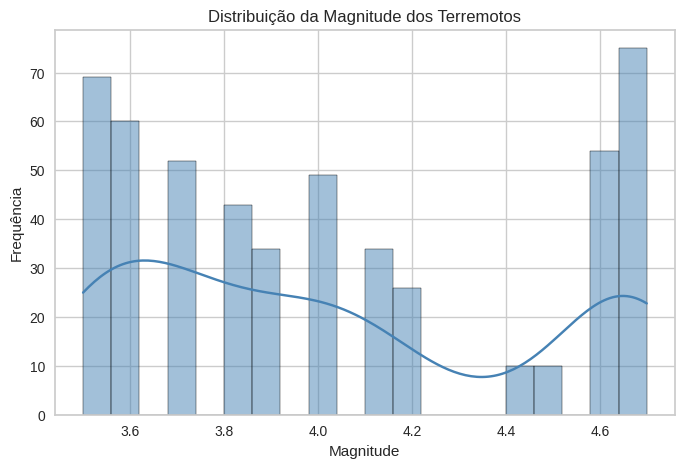

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Magnitud"], bins=20, kde=True, color="steelblue")
plt.title("Distribuição da Magnitude dos Terremotos")
plt.xlabel("Magnitude")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()

A magnitude varia entre 3.5 e 4.7, com média em torno de 4.03, indicando que nosso dataset é composto por terremotos de intensidade moderada. A distribuição parece concentrada próximo a valores médios, sem extremos muito afastados.

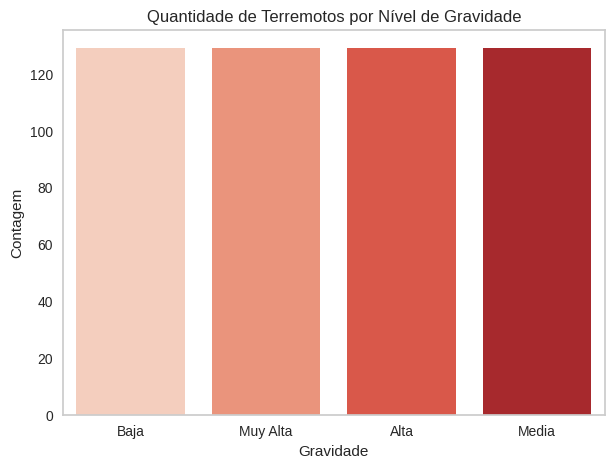

In [7]:
plt.figure(figsize=(7, 5))
sns.countplot(
    x="Gravedad", data=df, order=df["Gravedad"].value_counts().index, palette="Reds"
)
plt.title("Quantidade de Terremotos por Nível de Gravidade")
plt.xlabel("Gravidade")
plt.ylabel("Contagem")
plt.grid(axis="y")
plt.show()

Como o nome do dataset indica, os **dados são balanceados** e com o balanceamento do dataset.

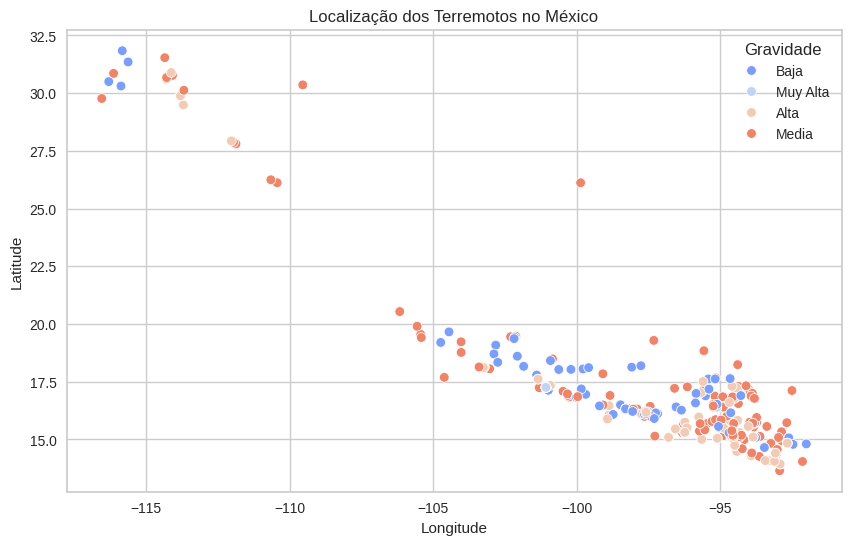

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Longitud", y="Latitud", hue="Gravedad", data=df, palette="coolwarm")
plt.title("Localização dos Terremotos no México")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Gravidade")
plt.grid(True)
plt.show()

Aparentemente, a localização dos eventos não impacta significativamente sua gravidade. Por isso, testaremos a modelagem com e sem essas variáveis. Ainda assim, o mapa de correlações abaixo pode sugerir alguma relação relevante entre localização e outras variáveis.

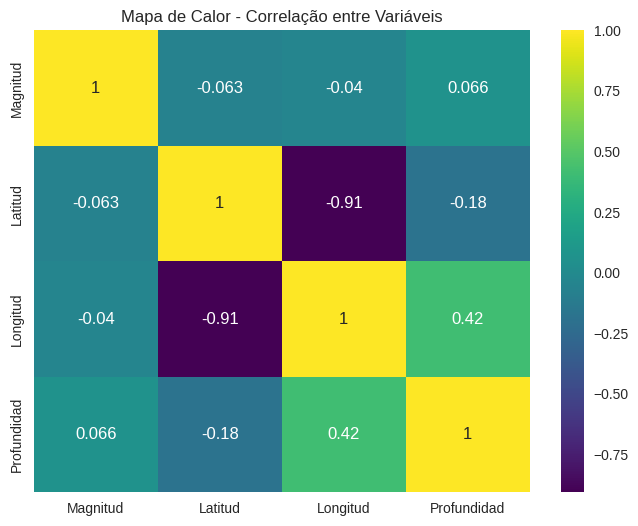

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    df[["Magnitud", "Latitud", "Longitud", "Profundidad"]].corr(),
    annot=True,
    cmap="viridis",
)
plt.title("Mapa de Calor - Correlação entre Variáveis")
plt.show()

In [10]:
df_train, df_test = train_test_split(
    df,
    test_size=0.2,  # 80% treino, 20% teste
    random_state=42,  # para que a divisão possa ser reproduzida
    stratify=df["Gravedad"],  # Mantém proporções de gravidade
)

df_test.to_csv(
    "dataset/df_test.csv", index=False
)  # Persistindo pois será utilizado no Streamlit

# Modelagem

In [11]:
s = setup(
    data=df_train,
    target="Gravedad",
    session_id=1,
    verbose=False,
    use_gpu=True,  # se seu PC não tem GPU compatível, comente essa linha
)

best_models = compare_models(n_select=5, sort="AUC")

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3050 Ti Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more l

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0140
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1430
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1170
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.6180
nb,Naive Bayes,0.9719,0.9974,0.9719,0.9761,0.9717,0.9626,0.9641,0.0140
knn,K Neighbors Classifier,0.6007,0.8162,0.6007,0.6032,0.5860,0.4677,0.4774,0.0410
dummy,Dummy Classifier,0.2431,0.5000,0.2431,0.0591,0.0951,0.0000,0.0000,0.0120
lr,Logistic Regression,0.8617,0.0000,0.8617,0.8660,0.8565,0.8156,0.8197,0.0660
svm,SVM - Linear Kernel,0.2881,0.0000,0.2881,0.1776,0.1866,0.0564,0.0824,0.0260
ridge,Ridge Classifier,0.6532,0.0000,0.6532,0.6728,0.6066,0.5373,0.5654,0.0130


In [12]:
for model in best_models:
    preds = predict_model(model, data=df_test)
    y_true = preds["Gravedad"]
    score_cols = [col for col in preds.columns if col.startswith("Score_")]
    if score_cols:
        y_proba = preds[score_cols]
    else:
        X_test = df_test.drop(columns=["Gravedad"])
        y_proba = model.predict_proba(X_test)

    auc = roc_auc_score(y_true, y_proba, multi_class="ovr")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.9712,0.9973,0.9712,0.9729,0.9707,0.9615,0.9624


## Conclusão

A validação dos resultados em teste confirmou nossa suspeita quanto à natureza puramente sintética dos dados utilizados. Observamos que, tanto em treino quanto em teste, foram atingados os valores máximos não apenas na métrica-alvo, mas também em todas as demais métricas avaliadas. Isso evidencia um cenário artificial, no qual o modelo não é verdadeiramente desafiado em sua capacidade preditiva.

Ainda assim, cientes dessa limitação e do controle experimental sob o qual os modelos foram avaliados, concluímos que é possível prosseguir com a implantação de um dos modelos campeões no aplicativo, considerando seu desempenho ótimo dentro do contexto atual.

## Persistindo o "melhor" modelo

Vamos salvar o picle do melhor modelo para usarmos no app Streamlit.

In [13]:
# Boa parte dos modelos atingiu o melhor AUC, vamos pegar o primeiro
final_model = best_models[0]

# Finalizar o modelo (retreinar com todo o conjunto de dados)
final_model = finalize_model(final_model)

save_model(final_model, "model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Magnitud', 'Latitud', 'Longitud',
                                              'Profundidad'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=F...
                                                               missing_values=nan,
                                                               strategy='most_frequent'))),
                 ('actual_estimator'

# Testando o modelo

In [14]:
# Carregar o modelo salvo
model = load_model("model")
predicoes = predict_model(model, data=df_test)
predicoes.head()

Transformation Pipeline and Model Successfully Loaded


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,Magnitud,Latitud,Longitud,Profundidad,Gravedad,prediction_label,prediction_score
472,4.7,17.258301,-101.078003,11.000000,Muy Alta,Muy Alta,1.0
359,3.5,17.180000,-95.400002,96.199997,Baja,Baja,1.0
189,3.6,16.346201,-98.240799,12.500000,Baja,Baja,1.0
219,4.1,14.745800,-94.503998,10.000000,Alta,Alta,1.0
349,4.5,27.931499,-112.035004,7.900000,Alta,Alta,1.0


In [15]:
# Esta será a mesma funcionalidade do app Streamlit.
app_dataset = pd.read_csv("dataset/df_test.csv")
app_dataset = app_dataset.drop(columns=["Gravedad"])
app_dataset.head()

,Magnitud,Latitud,Longitud,Profundidad
0,4.7,17.2583,-101.0780,11.0
1,3.5,17.1800,-95.4000,96.2
2,3.6,16.3462,-98.2408,12.5
3,4.1,14.7458,-94.5040,10.0
4,4.5,27.9315,-112.0350,7.9
